# **Data Analysis Process**

- The data analysis process is done in the following steps
    1. Asking Right Question About Data
    1. Data Wrangling/Preprocessing/Munging
        - Gathering Data
            - CSV files
            - API
            - Database
            - Web Scrapping etc.
        - Assessing Data
        - Cleaning Data 
    1. Exploratory Data Analysis(EDA) 
    1. Drawing Conclusion
    1. Communicating Results/Data Storytelling

## Question: Given the titanic dataset we need to analyse the survival rate of the passenger

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
titanic_df = pd.read_csv('./dataset/titanic.csv')

# **Asking Basic Questions**

### 1. How big is the data?

In [79]:
titanic_df.shape

(891, 12)

### 2. How does the data look like?

In [80]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S


### 3. What is the data type of cols?

In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4. Are there any missing values?

In [82]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5. How does the data look mathematically?

In [83]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 6. Are there duplicate values?

In [84]:
titanic_df.duplicated().sum()

0

### 7. How is the correlation between cols?

In [85]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# **EDA**

## **Univariate Analysis**

In [86]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S


1. Categorical Data

* Categorical Columns in the Dataset are
    - Survived
    - Pclass
    - Name (It's categorical but with too many categories and we need NLP to analyse it)
    - Sex
    - SibSp
    - Parch
    - Ticket (It's categorical but with too many categories)
    - Cabin (It's categorical but with too many categories)
    - Embarked

- **Countplot**

<AxesSubplot:xlabel='Survived', ylabel='count'>

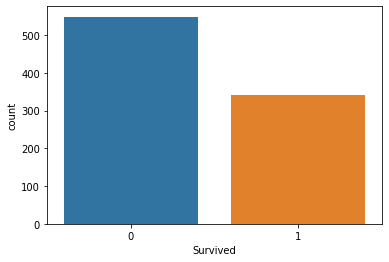

In [87]:
sns.countplot(x = titanic_df["Survived"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

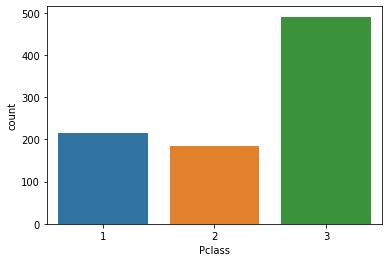

In [88]:
sns.countplot(x = titanic_df.Pclass)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

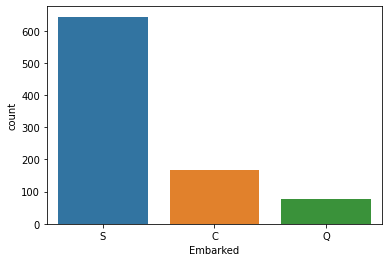

In [89]:
sns.countplot(x = titanic_df.Embarked)

- **Pie Chart**

<AxesSubplot:ylabel='Survived'>

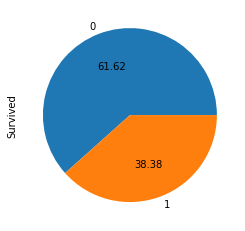

In [90]:
titanic_df['Survived'].value_counts().plot(kind="pie", autopct='%.2f')

<AxesSubplot:ylabel='Pclass'>

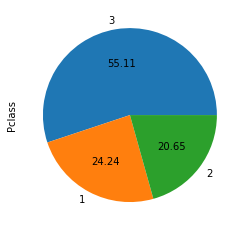

In [91]:
titanic_df['Pclass'].value_counts().plot(kind="pie", autopct="%.2f")

<AxesSubplot:ylabel='Sex'>

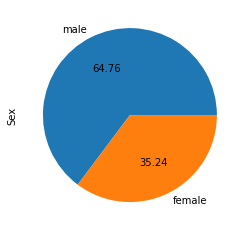

In [92]:
titanic_df['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

In [93]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Numerical Data

* Numerical Columns in the Dataset are
    - PassengerId
    - Age
    - Fare

- **Histogram**

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

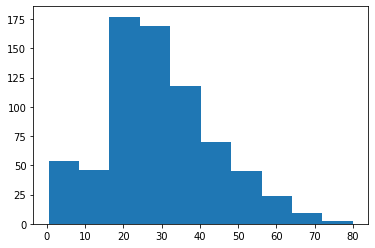

In [94]:
plt.hist(titanic_df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

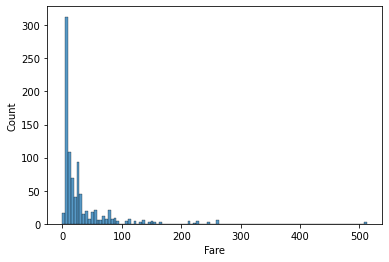

In [95]:
sns.histplot(titanic_df['Fare'])

- **Distplot**

c:\Users\Dheeraj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

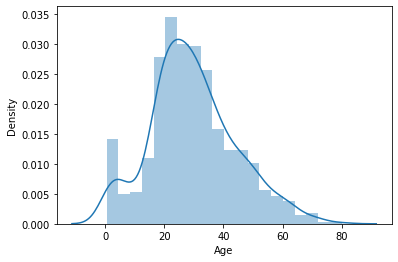

In [96]:
sns.distplot(titanic_df['Age'])

c:\Users\Dheeraj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

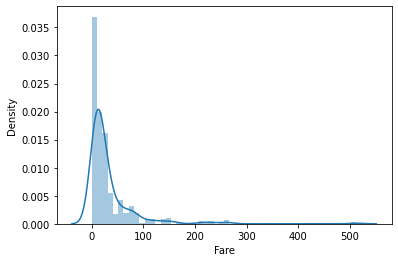

In [97]:
sns.distplot(titanic_df['Fare'])

- **Boxplot**

<AxesSubplot:xlabel='Age'>

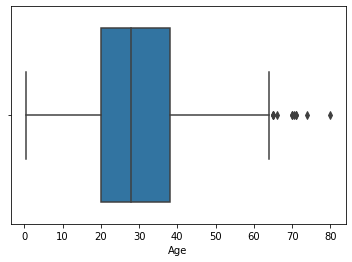

In [98]:
sns.boxplot(x = titanic_df['Age'])

<AxesSubplot:xlabel='Fare'>

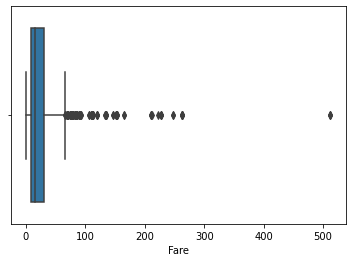

In [99]:
sns.boxplot(x = titanic_df['Fare'])


## **Bivariate and Multivariate Analysis**

- **Scatterplot (Numerical-Numerical)**

<AxesSubplot:xlabel='Age', ylabel='Fare'>

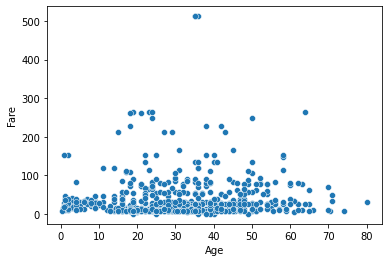

In [104]:
sns.scatterplot(x= titanic_df['Age'], y= titanic_df['Fare'])

- **Barplot (Numerical-Categorical)**

- **Boxplot (Numerical-Categorical)**

- **Distplot (Numerical-Categorical)**

- **Heatmap (Categorical-Categorical)**

- **Clustermap (Categorical-Categorical)**

- **Pairplot**

- **Lineplot (Numerical-Numerical)**